Load data

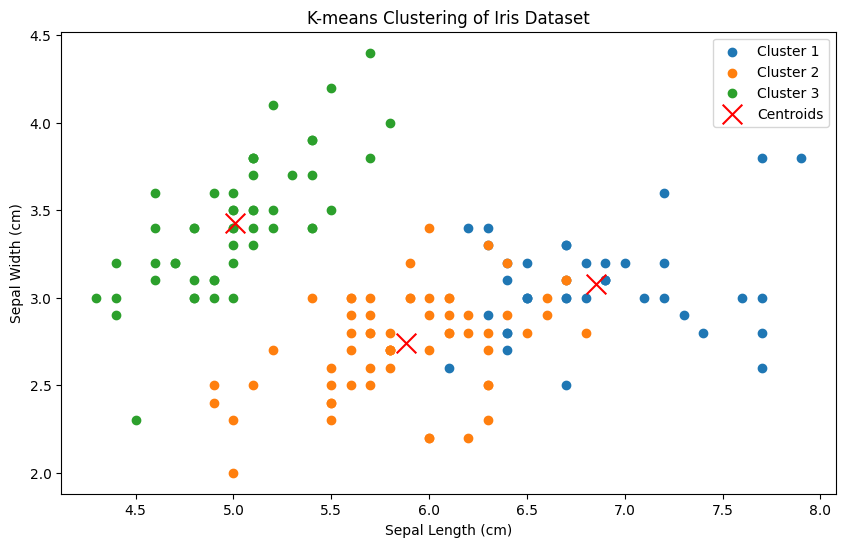

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Define the number of clusters (K)
K = 3

# Initialize centroids randomly
np.random.seed(0)
centroids = data[np.random.choice(data.shape[0], K, replace=False)]

# Number of iterations
max_iters = 100

for i in range(max_iters):
    # Assign each data point to the nearest centroid
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(K)])

    # Check for convergence
    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids

# Plot the clusters
plt.figure(figsize=(10, 6))
for k in range(K):
    cluster_data = data[labels == k]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {k + 1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()
